##### Copyright 2022 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
#@title Copyright 2022 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# Frame interpolation using the FILM model


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/hub/tutorials/tf_hub_film_example"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/hub/tutorials/tf_hub_film_example.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/hub/tutorials/tf_hub_film_example.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/hub/tutorials/tf_hub_film_example.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/google/film/1"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub model</a>
  </td>
</table>

Frame interpolation is the task of synthesizing many in-between images from a given set of images. The technique is often used for frame rate upsampling or creating slow-motion video effects.

In this colab, you will use the FILM model to do frame interpolation. The colab also provides code snippets to create videos from the interpolated in-between images.

For more information on FILM research, you can read more here:
- Google AI Blog: [Large Motion Frame Interpolation](https://ai.googleblog.com/2022/10/large-motion-frame-interpolation.html)
- Project Page: FILM: [Frame Interpolation for Large Motion](https://film-net.github.io/)


## Setup

In [2]:
!pip install mediapy
!sudo apt-get install -y ffmpeg

The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libparted-fs-resize0 libxmlb2
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  i965-va-driver intel-media-va-driver libaacs0 libaom0 libass9 libavcodec58
  libavdevice58 libavfilter7 libavformat58 libavresample4 libavutil56
  libbdplus0 libbluray2 libbs2b0 libcdio-cdda2 libcdio-paranoia2 libcdio18
  libchromaprint1 libcodec2-0.9 libdc1394-22 libfftw3-double3 libflite1
  libgme0 libgsm1 libigdgmm11 liblilv-0-0 libmysofa1 libopenal-data libopenal1
  libopenmpt0 libpostproc55 librubberband2 libsdl2-2.0-0 libserd-0-0 libshine3
  libsnappy1v5 libsndio7.0 libsord-0-0 libsratom-0-0 libssh-gcrypt-4
  libswresample3 libswscale5 libva-drm2 libva-x11-2 libva2 libvidstab1.1
  libwebpmux3 libx264-155 libx265-179 libxvidcore4 libzvbi

The following NEW packages will be installed:
  ffmpeg i965-va-driver intel-media-va-driver libaacs0 libaom0 libass9
  libavcodec58 libavdevice58 libavfilter7 libavformat58 libavresample4
  libavutil56 libbdplus0 libbluray2 libbs2b0 libcdio-cdda2 libcdio-paranoia2
  libcdio18 libchromaprint1 libcodec2-0.9 libdc1394-22 libfftw3-double3
  libflite1 libgme0 libgsm1 libigdgmm11 liblilv-0-0 libmysofa1 libopenal-data
  libopenal1 libopenmpt0 libpostproc55 librubberband2 libsdl2-2.0-0
  libserd-0-0 libshine3 libsnappy1v5 libsndio7.0 libsord-0-0 libsratom-0-0
  libssh-gcrypt-4 libswresample3 libswscale5 libva-drm2 libva-x11-2 libva2
  libvidstab1.1 libwebpmux3 libx264-155 libx265-179 libxvidcore4
  libzvbi-common libzvbi0 mesa-va-drivers ocl-icd-libopencl1 va-driver-all
0 upgraded, 56 newly installed, 0 to remove and 109 not upgraded.
Need to get 42.5 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://us-central1.gce.archive.ubuntu.com/ubuntu focal

Get:2 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libva2 amd64 2.7.0-2 [53.5 kB]
Get:3 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libva-drm2 amd64 2.7.0-2 [7044 B]
Get:4 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libva-x11-2 amd64 2.7.0-2 [11.9 kB]
Get:5 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 ocl-icd-libopencl1 amd64 2.2.11-1ubuntu1 [30.3 kB]
Get:6 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavutil56 amd64 7:4.2.7-0ubuntu0.1 [241 kB]
Get:7 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libcodec2-0.9 amd64 0.9.2-2 [7886 kB]
5% [7 libcodec2-0.9 5227 B/7886 kB 0%]

Get:8 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libgsm1 amd64 1.0.18-2 [24.4 kB]
Get:9 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libshine3 amd64 3.1.1-2 [23.2 kB]
Get:10 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libsnappy1v5 amd64 1.1.8-1build1 [16.7 kB]
Get:11 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libswresample3 amd64 7:4.2.7-0ubuntu0.1 [57.1 kB]
Get:12 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libwebpmux3 amd64 0.6.1-2ubuntu0.20.04.3 [19.5 kB]
Get:13 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libx264-155 amd64 2:0.155.2917+git0a84d98-2 [521 kB]
Get:14 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libx265-179 amd64 3.2.1-1build1 [1060 kB]
24% [14 libx265-179 6632 B/1060 kB 1%]

Get:15 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libxvidcore4 amd64 2:1.3.7-1 [201 kB]
Get:16 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libzvbi-common all 0.2.35-17 [32.5 kB]
Get:17 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libzvbi0 amd64 0.2.35-17 [237 kB]
27% [17 libzvbi0 13.7 kB/237 kB 6%]

Get:18 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavcodec58 amd64 7:4.2.7-0ubuntu0.1 [4878 kB]
28% [18 libavcodec58 6632 B/4878 kB 0%]

Get:19 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libass9 amd64 1:0.14.0-2 [88.0 kB]
Get:20 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libbluray2 amd64 1:1.2.0-1 [138 kB]
Get:21 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libchromaprint1 amd64 1.4.3-3build1 [37.6 kB]
Get:22 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libgme0 amd64 0.6.2-1build1 [123 kB]
40% [Waiting for headers]

Get:23 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libopenmpt0 amd64 0.4.11-1build1 [599 kB]
Get:24 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssh-gcrypt-4 amd64 0.9.3-2ubuntu2.3 [202 kB]
Get:25 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavformat58 amd64 7:4.2.7-0ubuntu0.1 [985 kB]
Get:26 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libbs2b0 amd64 3.1.0+dfsg-2.2build1 [10.2 kB]
Get:27 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libflite1 amd64 2.1-release-3 [12.8 MB]
44% [27 libflite1 20.5 kB/12.8 MB 0%]

Get:28 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libserd-0-0 amd64 0.30.2-1 [46.6 kB]
Get:29 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsord-0-0 amd64 0.16.4-1 [19.5 kB]
Get:30 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsratom-0-0 amd64 0.6.4-1 [16.9 kB]
Get:31 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 liblilv-0-0 amd64 0.24.6-1ubuntu0.1 [40.6 kB]
71% [Waiting for headers]

Get:32 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libmysofa1 amd64 1.0~dfsg0-1 [39.2 kB]
Get:33 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libpostproc55 amd64 7:4.2.7-0ubuntu0.1 [55.0 kB]
Get:34 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfftw3-double3 amd64 3.3.8-2ubuntu1 [728 kB]
Get:35 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 librubberband2 amd64 1.8.2-1build1 [89.4 kB]
Get:36 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libswscale5 amd64 7:4.2.7-0ubuntu0.1 [157 kB]
Get:37 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libvidstab1.1 amd64 1.1.0-2 [35.0 kB]
Get:38 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavfilter7 amd64 7:4.2.7-0ubuntu0.1 [1085 kB]
Get:39 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcdio18 amd64 2.0.0-2 [58.6 kB]
Get:40 http://us-centr

Get:42 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libdc1394-22 amd64 2.2.5-2.1 [79.6 kB]
Get:43 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libopenal-data all 1:1.19.1-1 [162 kB]
Get:44 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsndio7.0 amd64 1.5.0-3 [24.5 kB]
Get:45 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libopenal1 amd64 1:1.19.1-1 [492 kB]
Get:46 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsdl2-2.0-0 amd64 2.0.10+dfsg1-3 [407 kB]
Get:47 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavdevice58 amd64 7:4.2.7-0ubuntu0.1 [74.3 kB]
Get:48 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavresample4 amd64 7:4.2.7-0ubuntu0.1 [54.2 kB]
Get:49 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 ffmpeg amd64 7:4.2.7-0ubuntu0.1 [1453 kB]
83% [49 ffmpeg 6635 B/14

Get:50 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libigdgmm11 amd64 20.1.1+ds1-1 [111 kB]
Get:51 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 intel-media-va-driver amd64 20.1.1+dfsg1-1 [1764 kB]
Get:52 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libaacs0 amd64 0.9.0-2 [50.1 kB]
91% [Waiting for headers]

Get:53 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libbdplus0 amd64 0.1.2-3 [47.3 kB]
Get:54 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 mesa-va-drivers amd64 21.2.6-0ubuntu0.1~20.04.2 [2970 kB]
92% [54 mesa-va-drivers 2408 B/2970 kB 0%]

Get:55 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 i965-va-driver amd64 2.4.0-0ubuntu1 [924 kB]
Get:56 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 va-driver-all amd64 2.7.0-2 [4020 B]
Fetched 42.5 MB in 1s (45.8 MB/s)


Extracting templates from packages: 53%

Extracting templates from packages: 100%


Selecting previously unselected package libaom0:amd64.


(Reading database ... 173452 files and directories currently installed.)
Preparing to unpack .../00-libaom0_1.0.0.errata1-3+deb11u1build0.20.04.1_amd64.deb ...
Unpacking libaom0:amd64 (1.0.0.errata1-3+deb11u1build0.20.04.1) ...


Selecting previously unselected package libva2:amd64.


Preparing to unpack .../01-libva2_2.7.0-2_amd64.deb ...
Unpacking libva2:amd64 (2.7.0-2) ...


Selecting previously unselected package libva-drm2:amd64.
Preparing to unpack .../02-libva-drm2_2.7.0-2_amd64.deb ...
Unpacking libva-drm2:amd64 (2.7.0-2) ...


Selecting previously unselected package libva-x11-2:amd64.
Preparing to unpack .../03-libva-x11-2_2.7.0-2_amd64.deb ...
Unpacking libva-x11-2:amd64 (2.7.0-2) ...


Selecting previously unselected package ocl-icd-libopencl1:amd64.
Preparing to unpack .../04-ocl-icd-libopencl1_2.2.11-1ubuntu1_amd64.deb ...
Unpacking ocl-icd-libopencl1:amd64 (2.2.11-1ubuntu1) ...


Selecting previously unselected package libavutil56:amd64.


Preparing to unpack .../05-libavutil56_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libavutil56:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libcodec2-0.9:amd64.
Preparing to unpack .../06-libcodec2-0.9_0.9.2-2_amd64.deb ...
Unpacking libcodec2-0.9:amd64 (0.9.2-2) ...


Selecting previously unselected package libgsm1:amd64.


Preparing to unpack .../07-libgsm1_1.0.18-2_amd64.deb ...
Unpacking libgsm1:amd64 (1.0.18-2) ...
Selecting previously unselected package libshine3:amd64.


Preparing to unpack .../08-libshine3_3.1.1-2_amd64.deb ...
Unpacking libshine3:amd64 (3.1.1-2) ...


Selecting previously unselected package libsnappy1v5:amd64.
Preparing to unpack .../09-libsnappy1v5_1.1.8-1build1_amd64.deb ...
Unpacking libsnappy1v5:amd64 (1.1.8-1build1) ...


Selecting previously unselected package libswresample3:amd64.
Preparing to unpack .../10-libswresample3_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libswresample3:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libwebpmux3:amd64.
Preparing to unpack .../11-libwebpmux3_0.6.1-2ubuntu0.20.04.3_amd64.deb ...
Unpacking libwebpmux3:amd64 (0.6.1-2ubuntu0.20.04.3) ...


Selecting previously unselected package libx264-155:amd64.


Preparing to unpack .../12-libx264-155_2%3a0.155.2917+git0a84d98-2_amd64.deb ...
Unpacking libx264-155:amd64 (2:0.155.2917+git0a84d98-2) ...


Selecting previously unselected package libx265-179:amd64.


Preparing to unpack .../13-libx265-179_3.2.1-1build1_amd64.deb ...
Unpacking libx265-179:amd64 (3.2.1-1build1) ...


Selecting previously unselected package libxvidcore4:amd64.


Preparing to unpack .../14-libxvidcore4_2%3a1.3.7-1_amd64.deb ...
Unpacking libxvidcore4:amd64 (2:1.3.7-1) ...


Selecting previously unselected package libzvbi-common.
Preparing to unpack .../15-libzvbi-common_0.2.35-17_all.deb ...
Unpacking libzvbi-common (0.2.35-17) ...


Selecting previously unselected package libzvbi0:amd64.


Preparing to unpack .../16-libzvbi0_0.2.35-17_amd64.deb ...
Unpacking libzvbi0:amd64 (0.2.35-17) ...


Selecting previously unselected package libavcodec58:amd64.
Preparing to unpack .../17-libavcodec58_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libavcodec58:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libass9:amd64.


Preparing to unpack .../18-libass9_1%3a0.14.0-2_amd64.deb ...
Unpacking libass9:amd64 (1:0.14.0-2) ...


Selecting previously unselected package libbluray2:amd64.
Preparing to unpack .../19-libbluray2_1%3a1.2.0-1_amd64.deb ...
Unpacking libbluray2:amd64 (1:1.2.0-1) ...


Selecting previously unselected package libchromaprint1:amd64.
Preparing to unpack .../20-libchromaprint1_1.4.3-3build1_amd64.deb ...
Unpacking libchromaprint1:amd64 (1.4.3-3build1) ...


Selecting previously unselected package libgme0:amd64.


Preparing to unpack .../21-libgme0_0.6.2-1build1_amd64.deb ...
Unpacking libgme0:amd64 (0.6.2-1build1) ...


Selecting previously unselected package libopenmpt0:amd64.
Preparing to unpack .../22-libopenmpt0_0.4.11-1build1_amd64.deb ...
Unpacking libopenmpt0:amd64 (0.4.11-1build1) ...


Selecting previously unselected package libssh-gcrypt-4:amd64.
Preparing to unpack .../23-libssh-gcrypt-4_0.9.3-2ubuntu2.3_amd64.deb ...
Unpacking libssh-gcrypt-4:amd64 (0.9.3-2ubuntu2.3) ...


Selecting previously unselected package libavformat58:amd64.
Preparing to unpack .../24-libavformat58_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libavformat58:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libbs2b0:amd64.
Preparing to unpack .../25-libbs2b0_3.1.0+dfsg-2.2build1_amd64.deb ...
Unpacking libbs2b0:amd64 (3.1.0+dfsg-2.2build1) ...


Selecting previously unselected package libflite1:amd64.
Preparing to unpack .../26-libflite1_2.1-release-3_amd64.deb ...
Unpacking libflite1:amd64 (2.1-release-3) ...


Selecting previously unselected package libserd-0-0:amd64.
Preparing to unpack .../27-libserd-0-0_0.30.2-1_amd64.deb ...
Unpacking libserd-0-0:amd64 (0.30.2-1) ...


Selecting previously unselected package libsord-0-0:amd64.
Preparing to unpack .../28-libsord-0-0_0.16.4-1_amd64.deb ...
Unpacking libsord-0-0:amd64 (0.16.4-1) ...


Selecting previously unselected package libsratom-0-0:amd64.
Preparing to unpack .../29-libsratom-0-0_0.6.4-1_amd64.deb ...
Unpacking libsratom-0-0:amd64 (0.6.4-1) ...


Selecting previously unselected package liblilv-0-0:amd64.
Preparing to unpack .../30-liblilv-0-0_0.24.6-1ubuntu0.1_amd64.deb ...
Unpacking liblilv-0-0:amd64 (0.24.6-1ubuntu0.1) ...


Selecting previously unselected package libmysofa1:amd64.


Preparing to unpack .../31-libmysofa1_1.0~dfsg0-1_amd64.deb ...
Unpacking libmysofa1:amd64 (1.0~dfsg0-1) ...
Selecting previously unselected package libpostproc55:amd64.


Preparing to unpack .../32-libpostproc55_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libpostproc55:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libfftw3-double3:amd64.
Preparing to unpack .../33-libfftw3-double3_3.3.8-2ubuntu1_amd64.deb ...
Unpacking libfftw3-double3:amd64 (3.3.8-2ubuntu1) ...


Selecting previously unselected package librubberband2:amd64.


Preparing to unpack .../34-librubberband2_1.8.2-1build1_amd64.deb ...
Unpacking librubberband2:amd64 (1.8.2-1build1) ...
Selecting previously unselected package libswscale5:amd64.


Preparing to unpack .../35-libswscale5_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libswscale5:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libvidstab1.1:amd64.
Preparing to unpack .../36-libvidstab1.1_1.1.0-2_amd64.deb ...
Unpacking libvidstab1.1:amd64 (1.1.0-2) ...


Selecting previously unselected package libavfilter7:amd64.


Preparing to unpack .../37-libavfilter7_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libavfilter7:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libcdio18:amd64.


Preparing to unpack .../38-libcdio18_2.0.0-2_amd64.deb ...
Unpacking libcdio18:amd64 (2.0.0-2) ...


Selecting previously unselected package libcdio-cdda2:amd64.
Preparing to unpack .../39-libcdio-cdda2_10.2+2.0.0-1_amd64.deb ...
Unpacking libcdio-cdda2:amd64 (10.2+2.0.0-1) ...


Selecting previously unselected package libcdio-paranoia2:amd64.
Preparing to unpack .../40-libcdio-paranoia2_10.2+2.0.0-1_amd64.deb ...
Unpacking libcdio-paranoia2:amd64 (10.2+2.0.0-1) ...


Selecting previously unselected package libdc1394-22:amd64.
Preparing to unpack .../41-libdc1394-22_2.2.5-2.1_amd64.deb ...
Unpacking libdc1394-22:amd64 (2.2.5-2.1) ...


Selecting previously unselected package libopenal-data.


Preparing to unpack .../42-libopenal-data_1%3a1.19.1-1_all.deb ...
Unpacking libopenal-data (1:1.19.1-1) ...


Selecting previously unselected package libsndio7.0:amd64.
Preparing to unpack .../43-libsndio7.0_1.5.0-3_amd64.deb ...
Unpacking libsndio7.0:amd64 (1.5.0-3) ...


Selecting previously unselected package libopenal1:amd64.
Preparing to unpack .../44-libopenal1_1%3a1.19.1-1_amd64.deb ...
Unpacking libopenal1:amd64 (1:1.19.1-1) ...


Selecting previously unselected package libsdl2-2.0-0:amd64.
Preparing to unpack .../45-libsdl2-2.0-0_2.0.10+dfsg1-3_amd64.deb ...
Unpacking libsdl2-2.0-0:amd64 (2.0.10+dfsg1-3) ...


Selecting previously unselected package libavdevice58:amd64.
Preparing to unpack .../46-libavdevice58_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libavdevice58:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libavresample4:amd64.


Preparing to unpack .../47-libavresample4_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libavresample4:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package ffmpeg.
Preparing to unpack .../48-ffmpeg_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking ffmpeg (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libigdgmm11:amd64.
Preparing to unpack .../49-libigdgmm11_20.1.1+ds1-1_amd64.deb ...
Unpacking libigdgmm11:amd64 (20.1.1+ds1-1) ...


Selecting previously unselected package intel-media-va-driver:amd64.


Preparing to unpack .../50-intel-media-va-driver_20.1.1+dfsg1-1_amd64.deb ...
Unpacking intel-media-va-driver:amd64 (20.1.1+dfsg1-1) ...


Selecting previously unselected package libaacs0:amd64.
Preparing to unpack .../51-libaacs0_0.9.0-2_amd64.deb ...
Unpacking libaacs0:amd64 (0.9.0-2) ...


Selecting previously unselected package libbdplus0:amd64.


Preparing to unpack .../52-libbdplus0_0.1.2-3_amd64.deb ...
Unpacking libbdplus0:amd64 (0.1.2-3) ...
Selecting previously unselected package mesa-va-drivers:amd64.


Preparing to unpack .../53-mesa-va-drivers_21.2.6-0ubuntu0.1~20.04.2_amd64.deb ...
Unpacking mesa-va-drivers:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...


Selecting previously unselected package i965-va-driver:amd64.


Preparing to unpack .../54-i965-va-driver_2.4.0-0ubuntu1_amd64.deb ...
Unpacking i965-va-driver:amd64 (2.4.0-0ubuntu1) ...


Selecting previously unselected package va-driver-all:amd64.
Preparing to unpack .../55-va-driver-all_2.7.0-2_amd64.deb ...
Unpacking va-driver-all:amd64 (2.7.0-2) ...


Setting up libgme0:amd64 (0.6.2-1build1) ...
Setting up libssh-gcrypt-4:amd64 (0.9.3-2ubuntu2.3) ...
Setting up libshine3:amd64 (3.1.1-2) ...
Setting up libgsm1:amd64 (1.0.18-2) ...
Setting up libx264-155:amd64 (2:0.155.2917+git0a84d98-2) ...
Setting up libx265-179:amd64 (3.2.1-1build1) ...


Setting up libaom0:amd64 (1.0.0.errata1-3+deb11u1build0.20.04.1) ...
Setting up libmysofa1:amd64 (1.0~dfsg0-1) ...
Setting up libdc1394-22:amd64 (2.2.5-2.1) ...
Setting up libcdio18:amd64 (2.0.0-2) ...
Setting up libxvidcore4:amd64 (2:1.3.7-1) ...
Setting up libsnappy1v5:amd64 (1.1.8-1build1) ...
Setting up libass9:amd64 (1:0.14.0-2) ...


Setting up libva2:amd64 (2.7.0-2) ...
Setting up libigdgmm11:amd64 (20.1.1+ds1-1) ...
Setting up libcodec2-0.9:amd64 (0.9.2-2) ...
Setting up intel-media-va-driver:amd64 (20.1.1+dfsg1-1) ...
Setting up libaacs0:amd64 (0.9.0-2) ...
Setting up libfftw3-double3:amd64 (3.3.8-2ubuntu1) ...


Setting up librubberband2:amd64 (1.8.2-1build1) ...
Setting up libsndio7.0:amd64 (1.5.0-3) ...
Setting up libbdplus0:amd64 (0.1.2-3) ...
Setting up libvidstab1.1:amd64 (1.1.0-2) ...
Setting up libflite1:amd64 (2.1-release-3) ...
Setting up libva-drm2:amd64 (2.7.0-2) ...
Setting up ocl-icd-libopencl1:amd64 (2.2.11-1ubuntu1) ...


Setting up libbs2b0:amd64 (3.1.0+dfsg-2.2build1) ...
Setting up libopenal-data (1:1.19.1-1) ...
Setting up mesa-va-drivers:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...
Setting up libbluray2:amd64 (1:1.2.0-1) ...
Setting up libsdl2-2.0-0:amd64 (2.0.10+dfsg1-3) ...
Setting up libva-x11-2:amd64 (2.7.0-2) ...


Setting up libwebpmux3:amd64 (0.6.1-2ubuntu0.20.04.3) ...
Setting up libopenmpt0:amd64 (0.4.11-1build1) ...
Setting up libzvbi-common (0.2.35-17) ...
Setting up i965-va-driver:amd64 (2.4.0-0ubuntu1) ...
Setting up libserd-0-0:amd64 (0.30.2-1) ...
Setting up libzvbi0:amd64 (0.2.35-17) ...
Setting up libcdio-cdda2:amd64 (10.2+2.0.0-1) ...


Setting up libcdio-paranoia2:amd64 (10.2+2.0.0-1) ...
Setting up libopenal1:amd64 (1:1.19.1-1) ...
Setting up libavutil56:amd64 (7:4.2.7-0ubuntu0.1) ...
Setting up va-driver-all:amd64 (2.7.0-2) ...
Setting up libpostproc55:amd64 (7:4.2.7-0ubuntu0.1) ...
Setting up libsord-0-0:amd64 (0.16.4-1) ...


Setting up libsratom-0-0:amd64 (0.6.4-1) ...
Setting up libswscale5:amd64 (7:4.2.7-0ubuntu0.1) ...
Setting up liblilv-0-0:amd64 (0.24.6-1ubuntu0.1) ...
Setting up libswresample3:amd64 (7:4.2.7-0ubuntu0.1) ...
Setting up libavresample4:amd64 (7:4.2.7-0ubuntu0.1) ...
Setting up libavcodec58:amd64 (7:4.2.7-0ubuntu0.1) ...


Setting up libchromaprint1:amd64 (1.4.3-3build1) ...
Setting up libavformat58:amd64 (7:4.2.7-0ubuntu0.1) ...
Setting up libavfilter7:amd64 (7:4.2.7-0ubuntu0.1) ...
Setting up libavdevice58:amd64 (7:4.2.7-0ubuntu0.1) ...
Setting up ffmpeg (7:4.2.7-0ubuntu0.1) ...


Processing triggers for man-db (2.9.1-1) ...


Processing triggers for libc-bin (2.31-0ubuntu9.12) ...


In [3]:
import tensorflow as tf
import tensorflow_hub as hub

import requests
import numpy as np

from typing import Generator, Iterable, List, Optional
import mediapy as media

2023-11-16 12:30:01.561274: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 12:30:01.561323: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 12:30:01.562857: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load the model from TFHub

To load a model from TensorFlow Hub you need the tfhub library and the model handle which is its documentation url.

In [4]:
model = hub.load("https://tfhub.dev/google/film/1")

2023-11-16 12:30:06.583299: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## Util function to load images from a url or locally

This function loads an image and make it ready to be used by the model later.

In [5]:
_UINT8_MAX_F = float(np.iinfo(np.uint8).max)

def load_image(img_url: str):
  """Returns an image with shape [height, width, num_channels], with pixels in [0..1] range, and type np.float32."""

  if (img_url.startswith("https")):
    user_agent = {'User-agent': 'Colab Sample (https://tensorflow.org)'}
    response = requests.get(img_url, headers=user_agent)
    image_data = response.content
  else:
    image_data = tf.io.read_file(img_url)

  image = tf.io.decode_image(image_data, channels=3)
  image_numpy = tf.cast(image, dtype=tf.float32).numpy()
  return image_numpy / _UINT8_MAX_F


FILM's model input is a dictionary with the keys `time`, `x0`, `x1`:

- `time`: position of the interpolated frame. Midway is `0.5`.
- `x0`: is the initial frame.
- `x1`: is the final frame.

Both frames need to be normalized (done in the function `load_image` above) where each pixel is in the range of `[0..1]`.

`time` is a value between `[0..1]` and it says where the generated image should be. 0.5 is midway between the input images.

All three values need to have a batch dimension too.

In [6]:
# using images from the FILM repository (https://github.com/google-research/frame-interpolation/)

image_1_url = "https://github.com/google-research/frame-interpolation/blob/main/photos/one.png?raw=true"
image_2_url = "https://github.com/google-research/frame-interpolation/blob/main/photos/two.png?raw=true"

time = np.array([0.5], dtype=np.float32)

image1 = load_image(image_1_url)
image2 = load_image(image_2_url)

In [7]:
input = {
    'time': np.expand_dims(time, axis=0), # adding the batch dimension to the time
     'x0': np.expand_dims(image1, axis=0), # adding the batch dimension to the image
     'x1': np.expand_dims(image2, axis=0)  # adding the batch dimension to the image
}
mid_frame = model(input)

The model outputs a couple of results but what you'll use here is the `image` key, whose value is the interpolated frame.

In [8]:
print(mid_frame.keys())

dict_keys(['image', 'x1_warped', 'forward_flow_pyramid', 'forward_residual_flow_pyramid', 'backward_flow_pyramid', 'backward_residual_flow_pyramid', 'x0_warped'])


input image one,generated image,input image two

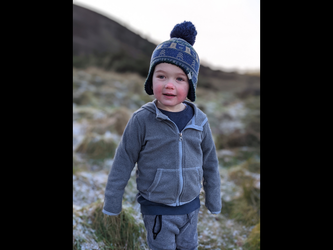
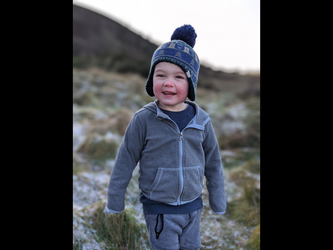
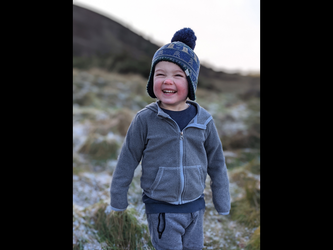

In [9]:
frames = [image1, mid_frame['image'][0].numpy(), image2]

media.show_images(frames, titles=['input image one', 'generated image', 'input image two'], height=250)

Let's create a video from the generated frames

In [10]:
media.show_video(frames, fps=3, title='FILM interpolated video')

## Define a Frame Interpolator Library

As you can see, the transition is not too smooth. 

To improve that you'll need many more interpolated frames.

You could just keep running the model many times with intermediary images but there is a better solution.

To generate many interpolated images and have a  smoother video you'll create an interpolator library.

In [11]:
"""A wrapper class for running a frame interpolation based on the FILM model on TFHub

Usage:
  interpolator = Interpolator()
  result_batch = interpolator(image_batch_0, image_batch_1, batch_dt)
  Where image_batch_1 and image_batch_2 are numpy tensors with TF standard
  (B,H,W,C) layout, batch_dt is the sub-frame time in range [0..1], (B,) layout.
"""


def _pad_to_align(x, align):
  """Pads image batch x so width and height divide by align.

  Args:
    x: Image batch to align.
    align: Number to align to.

  Returns:
    1) An image padded so width % align == 0 and height % align == 0.
    2) A bounding box that can be fed readily to tf.image.crop_to_bounding_box
      to undo the padding.
  """
  # Input checking.
  assert np.ndim(x) == 4
  assert align > 0, 'align must be a positive number.'

  height, width = x.shape[-3:-1]
  height_to_pad = (align - height % align) if height % align != 0 else 0
  width_to_pad = (align - width % align) if width % align != 0 else 0

  bbox_to_pad = {
      'offset_height': height_to_pad // 2,
      'offset_width': width_to_pad // 2,
      'target_height': height + height_to_pad,
      'target_width': width + width_to_pad
  }
  padded_x = tf.image.pad_to_bounding_box(x, **bbox_to_pad)
  bbox_to_crop = {
      'offset_height': height_to_pad // 2,
      'offset_width': width_to_pad // 2,
      'target_height': height,
      'target_width': width
  }
  return padded_x, bbox_to_crop


class Interpolator:
  """A class for generating interpolated frames between two input frames.

  Uses the Film model from TFHub
  """

  def __init__(self, align: int = 64) -> None:
    """Loads a saved model.

    Args:
      align: 'If >1, pad the input size so it divides with this before
        inference.'
    """
    self._model = hub.load("https://tfhub.dev/google/film/1")
    self._align = align

  def __call__(self, x0: np.ndarray, x1: np.ndarray,
               dt: np.ndarray) -> np.ndarray:
    """Generates an interpolated frame between given two batches of frames.

    All inputs should be np.float32 datatype.

    Args:
      x0: First image batch. Dimensions: (batch_size, height, width, channels)
      x1: Second image batch. Dimensions: (batch_size, height, width, channels)
      dt: Sub-frame time. Range [0,1]. Dimensions: (batch_size,)

    Returns:
      The result with dimensions (batch_size, height, width, channels).
    """
    if self._align is not None:
      x0, bbox_to_crop = _pad_to_align(x0, self._align)
      x1, _ = _pad_to_align(x1, self._align)

    inputs = {'x0': x0, 'x1': x1, 'time': dt[..., np.newaxis]}
    result = self._model(inputs, training=False)
    image = result['image']

    if self._align is not None:
      image = tf.image.crop_to_bounding_box(image, **bbox_to_crop)
    return image.numpy()

## Frame and Video Generation Utility Functions

In [12]:
def _recursive_generator(
    frame1: np.ndarray, frame2: np.ndarray, num_recursions: int,
    interpolator: Interpolator) -> Generator[np.ndarray, None, None]:
  """Splits halfway to repeatedly generate more frames.

  Args:
    frame1: Input image 1.
    frame2: Input image 2.
    num_recursions: How many times to interpolate the consecutive image pairs.
    interpolator: The frame interpolator instance.

  Yields:
    The interpolated frames, including the first frame (frame1), but excluding
    the final frame2.
  """
  if num_recursions == 0:
    yield frame1
  else:
    # Adds the batch dimension to all inputs before calling the interpolator,
    # and remove it afterwards.
    time = np.full(shape=(1,), fill_value=0.5, dtype=np.float32)
    mid_frame = interpolator(
        np.expand_dims(frame1, axis=0), np.expand_dims(frame2, axis=0), time)[0]
    yield from _recursive_generator(frame1, mid_frame, num_recursions - 1,
                                    interpolator)
    yield from _recursive_generator(mid_frame, frame2, num_recursions - 1,
                                    interpolator)


def interpolate_recursively(
    frames: List[np.ndarray], num_recursions: int,
    interpolator: Interpolator) -> Iterable[np.ndarray]:
  """Generates interpolated frames by repeatedly interpolating the midpoint.

  Args:
    frames: List of input frames. Expected shape (H, W, 3). The colors should be
      in the range[0, 1] and in gamma space.
    num_recursions: Number of times to do recursive midpoint
      interpolation.
    interpolator: The frame interpolation model to use.

  Yields:
    The interpolated frames (including the inputs).
  """
  n = len(frames)
  for i in range(1, n):
    yield from _recursive_generator(frames[i - 1], frames[i],
                                    times_to_interpolate, interpolator)
  # Separately yield the final frame.
  yield frames[-1]

In [13]:
times_to_interpolate = 6
interpolator = Interpolator()

## Running the Interpolator

In [14]:
input_frames = [image1, image2]
frames = list(
    interpolate_recursively(input_frames, times_to_interpolate,
                                        interpolator))


In [15]:
print(f'video with {len(frames)} frames')
media.show_video(frames, fps=30, title='FILM interpolated video')

video with 65 frames


For more information, you can visit [FILM's model repository](https://github.com/google-research/frame-interpolation).


## Citation

If you find this model and code useful in your works, please acknowledge it appropriately by citing:

```
@inproceedings{reda2022film,
 title = {FILM: Frame Interpolation for Large Motion},
 author = {Fitsum Reda and Janne Kontkanen and Eric Tabellion and Deqing Sun and Caroline Pantofaru and Brian Curless},
 booktitle = {The European Conference on Computer Vision (ECCV)},
 year = {2022}
}
```

```
@misc{film-tf,
  title = {Tensorflow 2 Implementation of "FILM: Frame Interpolation for Large Motion"},
  author = {Fitsum Reda and Janne Kontkanen and Eric Tabellion and Deqing Sun and Caroline Pantofaru and Brian Curless},
  year = {2022},
  publisher = {GitHub},
  journal = {GitHub repository},
  howpublished = {\url{https://github.com/google-research/frame-interpolation}}
}
```